# Для самостоятельного задания 1-й функций

In [1]:
#Велосипед, если не установлен модуль
try:
    from tqdm import tqdm
except:
    !pip install tqdm
    from tqdm import tqdm




import functions as f
import func_generator as fg


from GA import GA
import PARAMS as P
from Base import Base


import random
import numpy as np
from matplotlib import pyplot as plt


######################################################################################
func_list = np.array([f.linear, f.sin, f.ln, f.sqrt, f.my_abs, f.sqr, f.hyper, f.exp])

# Настройка области определения

In [2]:
#Граници по оси Х
left_border = 0 #от
right_border = 100 #до


##########
interval = [left_border, right_border]

# Генерация функции

 +1.0000000000 × (1.000000x +0.000000)²  +0.000000


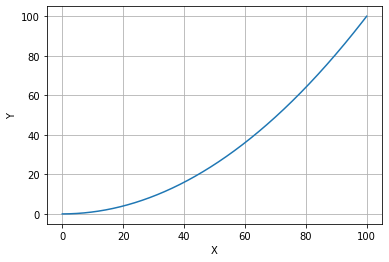

In [3]:
#0 - прямая
#1- синус
#2 - логарифм
#3 - квадратный корень
#4 - модуль
#5 - квадрат
#6 - куб
#7 - экспонента
f = 5


# ax - на это число будет умножаться х
# dx - прибавляется к ax*x
# a - на это число умножается рез-тат
# dy - смещение по оси y
### т.е. f(x) = a*h(ax*x+dx) + dy    (h - базовая ф-я... выбирается выше)
ax = 1.
dx = 0.
a  = 1
dy = 0


####################
#Описываем функцию
h_str = ' {:+3.10f} × {} '.format(
        a, 
        P.func_name[func_list[f]].format('{:-3.6f}x {:+3.6f}'.format(ax,dx))
    ) + ' {:+3.6f}'.format(dy)


#Генерируем саму ф-ю
f_genotip = [[0,0,0,0] for i in func_list]
f_genotip[f][:] = [dx, ax, a, dy]
f = Base["funcs"]["assembly"](f_genotip, func_list)

plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(np.linspace(interval[0],interval[1],10000),
         [f(x) for x in np.linspace(interval[0],interval[1],10000)]
)


print(h_str)
plt.show()

# Настройка генерации датасета

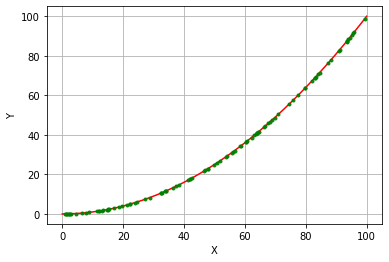

In [4]:
dots_count = 100   # число точек в датасете
noise      = 0.05   # величина шума (чем больше - тем зашумлённей данные)



####################
# Создаём датасет
data = fg.generate_dataset(f, dots_count = dots_count, x_range = interval, noise_ratio = noise)

plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(np.linspace(interval[0],interval[1],10000),
         [f(x) for x in np.linspace(interval[0],interval[1],10000)],
         'r'
)
plt.plot(data[0], data[1], '.g', alpha = 0.9)
plt.show()

# Задание параметров алгоритма

Инструкция по настройке:
tip - какой вариант алгоритма будет использоваться, может принимать значения:
- 0 - первая версия (выбираем 2 лучших представителя, делаем кучу копий, в каждой копии заменяем по одному нуклеотиду)
- 1 - Канонический ГА
- 2 - Генитор
- 3 - СНС
- 4 - С нефиксированным размером популяции (оооооооооочень медленный)

steps - число итераций в алгоритме

100%|██████████| 10000/10000 [04:47<00:00, 34.83it/s]


h(x) =   +0.4556218281 × (0.238579x +0.284924) 
 +0.2898521750 × sin(0.237154x +1.053331) 
 +4.1141043759 × ln(0.040572x +0.633658) 
 +1.6880749914 × √(0.190779x -0.785262) 
 +2.8990368983 × |0.086014x -2.171397| 
 +0.8761098529 × (0.195201x +1.329147)² 
 +1.8136442067 × (0.287397x +0.061989)³ 
 +0.3213847935 × exp(0.034120x +0.145945) 
 -8.062606

Значение целевой функции:
h_pr = [19.06324037];
f_pr = [0.24192815]

СКО:
h_sko = [0.43661471];
f_sko = [0.04918619]


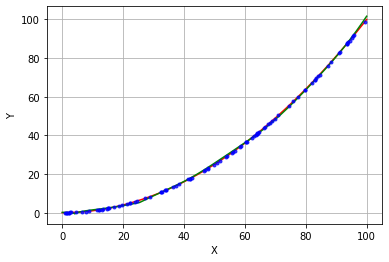

In [5]:
tip = 2 #от 0 до 4
steps = 10000


##########################################################
##########################################################
##########################################################
h, h_pr, h_str = Base["funcs"]["Go"](GA[tip], func_list, data, steps)

X = np.linspace(interval[0], interval[1], 10000)
fY = [f(x) for x in X]
hY = [h(x) for x in X]

plt.grid()
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(X, fY, 'r')
plt.plot(X, hY, 'g', alpha = 0.99)
plt.plot(data[0], data[1], '.b', alpha = 0.75)

print('h(x) = ', h_str)

print("\nЗначение целевой функции:")
print('h_pr = {};\nf_pr = {}'.format(h_pr, Base["funcs"]["E"](data[1],[f(x)for x in data[0]])))

print("\nСКО:")
print('h_sko = {};\nf_sko = {}'.format(
    (h_pr/len(data[0]))**0.5, 
    (Base["funcs"]["E"](data[1],[f(x)for x in data[0]])/len(data[0]))**0.5
))

plt.show()